In [0]:
# List the files inside the dataset_Lenskart directory
display(dbutils.fs.ls('dbfs:/mnt/blobstorage/dataset_Lenskart/'))

In [0]:
from pyspark.sql.functions import year, to_date

# Load transaction data into DataFrame
df_transaction = spark.read.format("csv").option("header", "true").load("dbfs:/mnt/blobstorage/dataset_Lenskart/transaction.csv")

# Extract year from transaction date
df_transaction = df_transaction.withColumn("order_year", year(to_date("order_date", "dd-MM-yyyy")))

# Define current_year and previous_year
current_year = 2024  # Set the current year here
previous_year = current_year - 1

# Filter data for current year and previous year
current_year_transactions = df_transaction.filter(df_transaction["order_year"] == current_year).count()
previous_year_transactions = df_transaction.filter(df_transaction["order_year"] == previous_year).count()

# Display results
print("Current Year Transactions:", current_year_transactions)
print("Previous Year Transactions:", previous_year_transactions)


Current Year Transactions: 12505
Previous Year Transactions: 49907


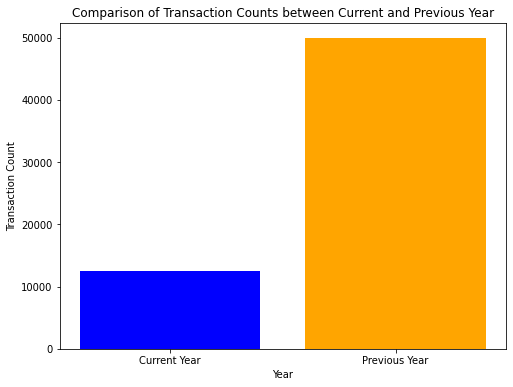

In [0]:
import matplotlib.pyplot as plt

# Define data for visualization
years = ['Current Year', 'Previous Year']
transaction_counts = [current_year_transactions, previous_year_transactions]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(years, transaction_counts, color=['blue', 'orange'])
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Comparison of Transaction Counts between Current and Previous Year')
plt.show()
